# Final Project

### Name: Drew Norton

In [295]:
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
import os

In [297]:
file_path = r"/Users/drewnorton/Downloads/data 200/chromedriver-mac-arm64/chromedriver"
absolute_file_path = os.path.abspath(file_path)
service = webdriver.ChromeService()
driver = webdriver.Chrome()
driver.get('https://www.baseball-reference.com/leagues/majors/2025-standard-batting.shtml')

In [299]:
def player_age_success(age_min, avg_min):
    playeragelist = []
    rows = driver.find_elements('xpath', '//*[@id="players_standard_batting"]/tbody/tr')
    for row in rows:
        try:
            age_element = row.find_element('xpath', './td[@data-stat="age"]')
            avg_element = row.find_element('xpath', './td[@data-stat="b_batting_avg"]')
            player_age = age_element.text
            batting_avg = avg_element.text
            if int(player_age) >= age_min and batting_avg != "":
                if float(batting_avg) >= avg_min:
                    playeragelist.append([float(player_age), float(batting_avg)])
        except:
            continue
    return playeragelist
player_age_success(35, .100)

[[35.0, 0.252],
 [37.0, 0.341],
 [39.0, 0.234],
 [35.0, 0.233],
 [35.0, 0.304],
 [38.0, 0.257],
 [37.0, 0.183],
 [35.0, 0.362],
 [35.0, 0.225],
 [35.0, 0.235],
 [36.0, 0.188],
 [35.0, 0.193],
 [35.0, 0.271],
 [35.0, 0.182],
 [40.0, 0.17],
 [35.0, 0.254],
 [37.0, 0.148],
 [38.0, 0.204],
 [36.0, 0.25],
 [36.0, 0.217],
 [35.0, 0.225],
 [36.0, 0.294],
 [41.0, 0.111],
 [36.0, 0.237],
 [35.0, 0.429]]

### Description:

The path I created goes to  the "Standard Batting" stats table on Baseball Reference’s 2025 MLB batting stats page. This table has an identifiable structure with each row <tr> representing a player and each data cell <td> marked with a data-stat attribute making it easy to filter through the batting averages and ages. My function navigates this table using XPath to locate all player rows within the the table body. It then isolates each player’s age and batting average by referencing the specific data-stat values that I was able to recognize a pattern in. For each player it had data-stat= and then either "age" or "b_batting_avg" depending on what cell I was in(there were also other stats that are irrelevant in my case). The function filters for players above the inputted age (age_min) and with a batting average above an inputted threshold (avg_min), and appends the results to a list. This approach uses the website's nice labeling (data-stat) to reliably extract specific statistics. The result is a list of lists of ages and batting averages above a specific threshold. In my function call I retrieve age and average of players over 35 years old and an average above 100.

In [302]:
results = player_age_success(35, 0.100)
df = pd.DataFrame(results, columns=["Age", "Batting Average"]).sort_values(by=['Age', 'Batting Average'], ascending = [True, True]).reset_index(drop=True)
print(df)

     Age  Batting Average
0   35.0            0.182
1   35.0            0.193
2   35.0            0.225
3   35.0            0.225
4   35.0            0.233
5   35.0            0.235
6   35.0            0.252
7   35.0            0.254
8   35.0            0.271
9   35.0            0.304
10  35.0            0.362
11  35.0            0.429
12  36.0            0.188
13  36.0            0.217
14  36.0            0.237
15  36.0            0.250
16  36.0            0.294
17  37.0            0.148
18  37.0            0.183
19  37.0            0.341
20  38.0            0.204
21  38.0            0.257
22  39.0            0.234
23  40.0            0.170
24  41.0            0.111


### Description:

Here I made the data I retrieved from my function of batting averages over 100 for players over 35. Each cell is a single value, each row is an observation, and each column is a variable. This means it satisfies all the requirements of tidy data. The only thing I needed to add was the column names and sorting the data first by age, then by batting average, resetting the indexes.

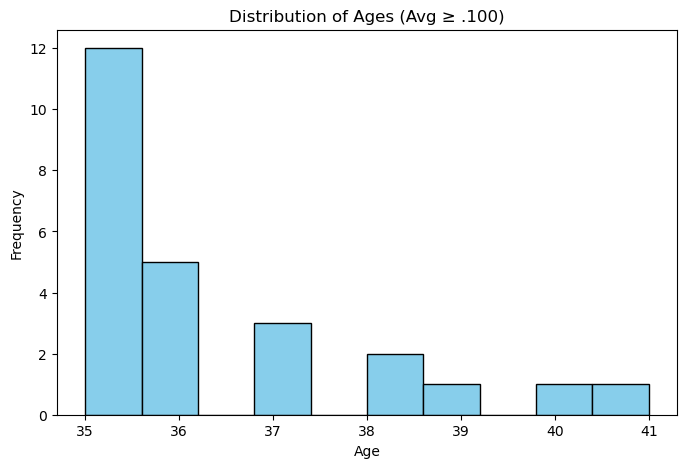

In [305]:
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Ages (Avg ≥ .100)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

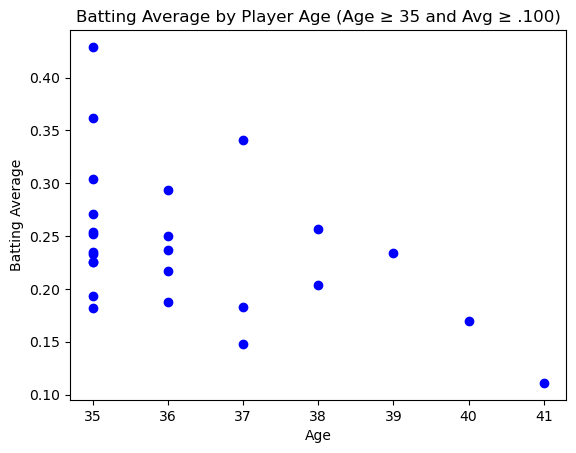

In [307]:
plt.scatter(df["Age"], df["Batting Average"], color='blue')
plt.title("Batting Average by Player Age (Age ≥ 35 and Avg ≥ .100)")
plt.xlabel("Age")
plt.ylabel("Batting Average")
plt.show()

### Description:

The first visualization is showing a frequency distribution for players' age given that they are hitting over .100 and are 35 or older. This is interesting because it displays a descending histogram. Players that are exactly 35 have by far the most representation. This shows that the older players are either losing talent and hitting below .100, getting hurt, or retiring. It might suggest that 35 is a possible drop-off age where talent level declines afterwards. My second visualization displays a scatter plot of batting average by age for the specific age and average restrictions. It is not a sharp trend, but there is definitely a downward slope as age goes up average goes down. This further suggests the drop-off after age 35.

In [310]:
baseball = pd.read_csv('baseball_players.csv')
groupeddf = baseball.groupby('Position')
agg1 = groupeddf.agg({'Age': ['mean', 'max', 'min']})
agg2 = df.groupby('Age').agg({'Batting Average':['mean', 'max', 'min']})
combined = pd.concat({'By Age': agg2, 'By Position': agg1}, axis=0)
print(combined)


                              Batting Average                      Age         \
                                         mean    max    min       mean    max   
By Age      35.0                      0.26375  0.429  0.182        NaN    NaN   
            36.0                      0.23720  0.294  0.188        NaN    NaN   
            37.0                      0.22400  0.341  0.148        NaN    NaN   
            38.0                      0.23050  0.257  0.204        NaN    NaN   
            39.0                      0.23400  0.234  0.234        NaN    NaN   
            40.0                      0.17000  0.170  0.170        NaN    NaN   
            41.0                      0.11100  0.111  0.111        NaN    NaN   
By Position Catcher                       NaN    NaN    NaN  29.563684  38.49   
            Designated_Hitter             NaN    NaN    NaN  30.389444  38.76   
            First_Baseman                 NaN    NaN    NaN  29.474727  48.52   
            Outfielder      

In [312]:
groupeddf = baseball.groupby('Position')
gdf = groupeddf.agg({'Height(inches)': ['mean', 'max', 'min']})
agg2 = df.groupby('Age').agg({'Batting Average':['mean', 'max', 'min']})
combined1 = pd.concat({'By Age': agg2, 'By Position': gdf}, axis=0)
print(combined1)

                              Batting Average               Height(inches)  \
                                         mean    max    min           mean   
By Age      35.0                      0.26375  0.429  0.182            NaN   
            36.0                      0.23720  0.294  0.188            NaN   
            37.0                      0.22400  0.341  0.148            NaN   
            38.0                      0.23050  0.257  0.204            NaN   
            39.0                      0.23400  0.234  0.234            NaN   
            40.0                      0.17000  0.170  0.170            NaN   
            41.0                      0.11100  0.111  0.111            NaN   
By Position Catcher                       NaN    NaN    NaN      72.723684   
            Designated_Hitter             NaN    NaN    NaN      74.222222   
            First_Baseman                 NaN    NaN    NaN      74.000000   
            Outfielder                    NaN    NaN    NaN     

### Description:

In these 2 data visualizations, I aggregated the dataframes after combining them. Because of the differences in data restrictions for each data set, it was nearly impossible to create a graph that would make sense. Instead, these two visualizations show aggregates of data frames. The first data visualization shows the aggregate of batting average by age, along with age by position. You can clearly see the mean batting average and max batting average go down as the age goes up. Right below, it shows that the highest mean age is at the position DH. The highest maximum age is 48 at first base. This suggests that the highest longevity is at these two positions and implies that most of the batting averages I was retrieving for 35-year-olds and above are playing these positions. The second data visualization displays the aggregate of batting average by age and height by position. This shows the largest mean height is again DH and 1st base. This may imply the height of these 35+ year olds to be on the taller end.

### Reflection:

This data corroborates my claim that the positions of 1st base and DH are better for durability. It shows the batting average going down as age goes up. The largest mean and max ages are at 1st base and DH. This is why most of the averages depicted are actually pretty good despite the decreasing trend. The players who are that old are only still in the league for their hitting. One aspect I wish I were able to look at was the average by position as well as weight by age. Baseball reference used a number system with symbols for the position, which made it hard to code in. They also didn't include weight with batting average. I would like to look more in-depth at whether weights are increasing as players are getting older. I would also like to look at the slugging percentage by position to confirm my hypothesis that players at 1st base and DH are most often power hitters. 